<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
#Importations
products = pd.read_csv("C:/Users/AUCLAIR/Documents/Projet_Data_9/products.csv", sep=';')
transactions = pd.read_csv("C:/Users/AUCLAIR/Documents/Projet_Data_9/transactions.csv", sep=';')
customers = pd.read_csv("C:/Users/AUCLAIR/Documents/Projet_Data_9/customers.csv", sep=';')

C:\Users\AUCLAIR\AppData\Local\Temp\ipykernel_19032\1201710140.py:3: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  transactions = pd.read_csv("C:/Users/AUCLAIR/Documents/Projet_Data_9/transactions.csv", sep=';')


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

**Analyse de products:**

In [3]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [4]:
products.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

In [5]:
doublons= products.duplicated(subset="id_prod")
products[doublons]

,id_prod,price,categ


In [6]:
products.isna().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [7]:
products.describe()

,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [8]:
#Analyse catégories  des produits
products["categ"].unique()

array([0, 1, 2])

**Analyse de transactions:**

In [9]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


In [10]:
transactions.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

In [11]:
transactions.isna().sum()

id_prod       361041
date          361041
session_id    361041
client_id     361041
dtype: int64

In [12]:
len(transactions)

1048575

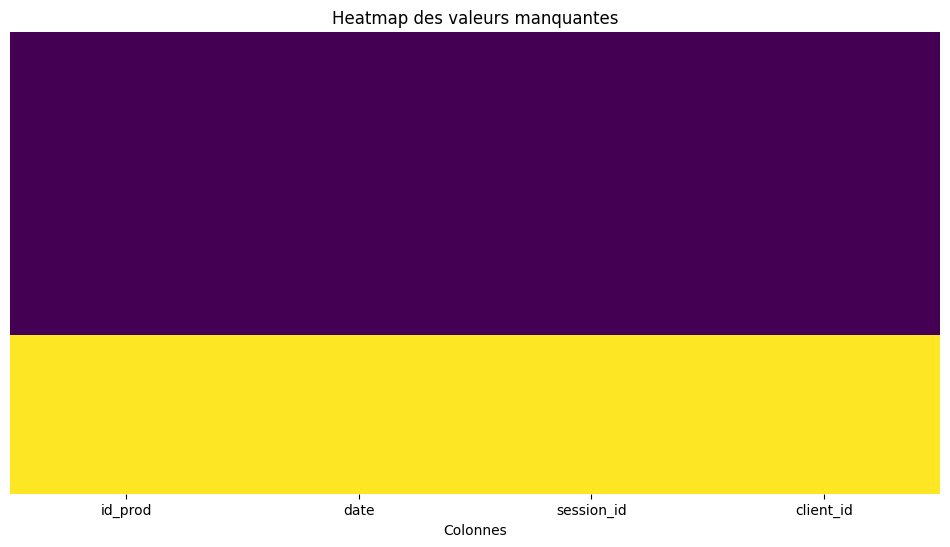

In [13]:
# Heatmap pour visualiser les valeurs manquantes
plt.figure(figsize=(12, 6))
sns.heatmap(
    transactions.isnull(),                 # True là où c’est manquant
    cbar=False,                  # cache la barre de couleur
    cmap='viridis',             # ou 'magma', 'Greys', …
    yticklabels=False            # pour des tables larges : évite le chevauchement
)
plt.title('Heatmap des valeurs manquantes')
plt.xlabel('Colonnes')
plt.show()

In [14]:
transactions[transactions.isna()]

,id_prod,date,session_id,client_id
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
1048570,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN


In [15]:
transactions_NAN = transactions.isna().all(axis=1)
transactions = transactions[~transactions_NAN]
len(transactions)

687534

In [16]:
transactions.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [17]:
#Analyse de la colonne 'date'
transactions['date'] = pd.to_datetime(transactions['date'])
doublons_dates = transactions.duplicated(subset = "date", keep=False)
transactions[doublons_dates]

,id_prod,date,session_id,client_id
197076,1_414,2021-10-02 01:17:27.925296,s_107282,c_70
197077,1_651,2021-10-02 01:17:27.925296,s_107282,c_70
197086,1_311,2021-10-02 01:23:55.310730,s_100028,c_5723
197087,1_495,2021-10-02 01:23:55.310730,s_100028,c_5723
197129,1_288,2021-10-02 02:16:39.453765,s_102820,c_1970
...,...,...,...,...
217993,1_293,2021-10-22 22:28:58.194395,s_109098,c_7272
219528,1_462,2021-10-24 21:11:54.305246,s_101347,c_711
219529,1_245,2021-10-24 21:11:54.305246,s_101347,c_711
220141,1_157,2021-10-25 17:06:59.656670,s_101176,c_436


In [18]:
# on valide pour pour une même session_id, il peut y avoir, plusiseurs dates 
session_date_counts = transactions.groupby('session_id')['date'].nunique()

# Filtrer ceux qui ont plus d'une date
sessions_multi_dates = session_date_counts[session_date_counts > 1]

# Afficher les sessions concernées
print(sessions_multi_dates)

session_id
s_100       2
s_1000      4
s_10000     3
s_100001    2
s_100002    2
           ..
s_99992     2
s_99994     3
s_99996     4
s_99998     3
s_99999     3
Name: date, Length: 181182, dtype: int64


**Je remarque plus d'une centaine de doublons sur la colonne date.**

In [19]:
# Période des doublons de date
doublons_octobre_21 = transactions[doublons_dates]
doublons_octobre_21['date'].min(), doublons_octobre_21['date'].max()

(Timestamp('2021-10-02 01:17:27.925296'),
 Timestamp('2021-10-25 17:06:59.656670'))

In [20]:
# Recherche de la nature des doublons
doublons_octobre_21 = transactions[doublons_dates]
grouped = doublons_octobre_21.groupby(['session_id', 'client_id'])
duplicated_rows = grouped.filter(lambda x: x['id_prod'].duplicated().any())
print(duplicated_rows.sort_values(by=['session_id', 'client_id', 'id_prod']))

Empty DataFrame
Columns: [id_prod, date, session_id, client_id]
Index: []


In [21]:
#Nombre de transactions
nb_transactions = transactions.drop_duplicates(subset=['session_id', 'client_id', 'date']).shape[0]
nb_transactions

687415

In [22]:
# Nombre de produits vendus
len(transactions)

687534

In [23]:
transactions['date'].describe()

count                           687534
mean     2022-03-01 21:24:00.618519296
min         2021-03-01 00:01:07.843138
25%      2021-09-10 10:35:20.642323456
50%      2022-02-27 06:50:25.400120064
75%      2022-08-28 22:16:49.841665536
max         2023-02-28 23:58:30.792755
Name: date, dtype: object

In [24]:
# Range des dates
print(transactions['date'].min(), transactions['date'].max())

2021-03-01 00:01:07.843138 2023-02-28 23:58:30.792755


**Analyse de customers:**

In [25]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [26]:
# Vérification des valeurs manquantes
customers.isna().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [27]:
doublons_customers = customers.isna().all(axis=1)
customers[doublons_customers]

,client_id,sex,birth


In [28]:
customers.dtypes

client_id    object
sex          object
birth         int64
dtype: object

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

**Jointures**

In [29]:
len(products), len(customers), len(transactions)

(3286, 8621, 687534)

In [30]:
df_merge = products.merge(transactions, on = 'id_prod')
df_merge.isna().sum()

id_prod       0
price         0
categ         0
date          0
session_id    0
client_id     0
dtype: int64

In [31]:
df_data = df_merge.merge(customers, on ="client_id")
df_data.isna().sum()

id_prod       0
price         0
categ         0
date          0
session_id    0
client_id     0
sex           0
birth         0
dtype: int64

In [32]:
len(df_data)

687534

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyses graphiques</h2>
</div>

**ANALYSE**

In [33]:
df_data.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0,2021-03-01 04:13:00.107748,s_101,c_8533,m,1972
1,0_1421,19.99,0,2021-03-01 13:48:20.214075,s_285,c_5299,f,1967
2,0_1421,19.99,0,2021-03-01 15:07:42.730079,s_317,c_8024,f,1936
3,0_1421,19.99,0,2021-03-02 03:39:21.811833,s_563,c_7702,f,1989
4,0_1421,19.99,0,2021-03-02 19:09:41.789425,s_850,c_4057,m,1981


In [34]:
# Moyenne mobile
df_daily_sales = df_data.groupby(df_data['date'].dt.date)['price'].sum().reset_index()
df_daily_sales.rename(columns={'date': 'day', 'price': 'revenue'}, inplace=True)
df_daily_sales['revenue_rolling'] = df_daily_sales['revenue'].rolling(window=7).mean()
df_daily_sales.head()

,day,revenue,revenue_rolling
0,2021-03-01,16565.22,NaN
1,2021-03-02,15486.45,NaN
2,2021-03-03,15198.69,NaN
3,2021-03-04,15196.07,NaN
4,2021-03-05,17471.37,NaN


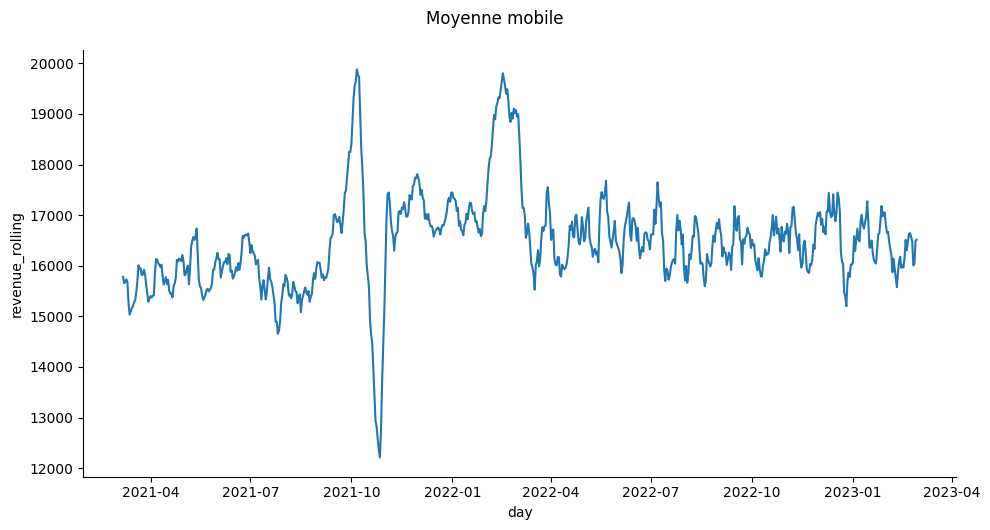

In [35]:
# Graphique de la moyenne mobile
g = sns.relplot(data = df_daily_sales, x = "day", y = "revenue_rolling", kind = "line", aspect = 2)
g.fig.suptitle("Moyenne mobile", y=1.05)
plt.show()

In [36]:
# Évolution des achats par catégorie dans le temps
df_grouped = df_data.groupby([df_data['date'].dt.date, 'categ']).size().reset_index(name='count')
df_grouped

,date,categ,count
0,2021-03-01,0,581
1,2021-03-01,1,335
2,2021-03-01,2,46
3,2021-03-02,0,620
4,2021-03-02,1,276
...,...,...,...
2185,2023-02-27,1,332
2186,2023-02-27,2,75
2187,2023-02-28,0,472
2188,2023-02-28,1,439


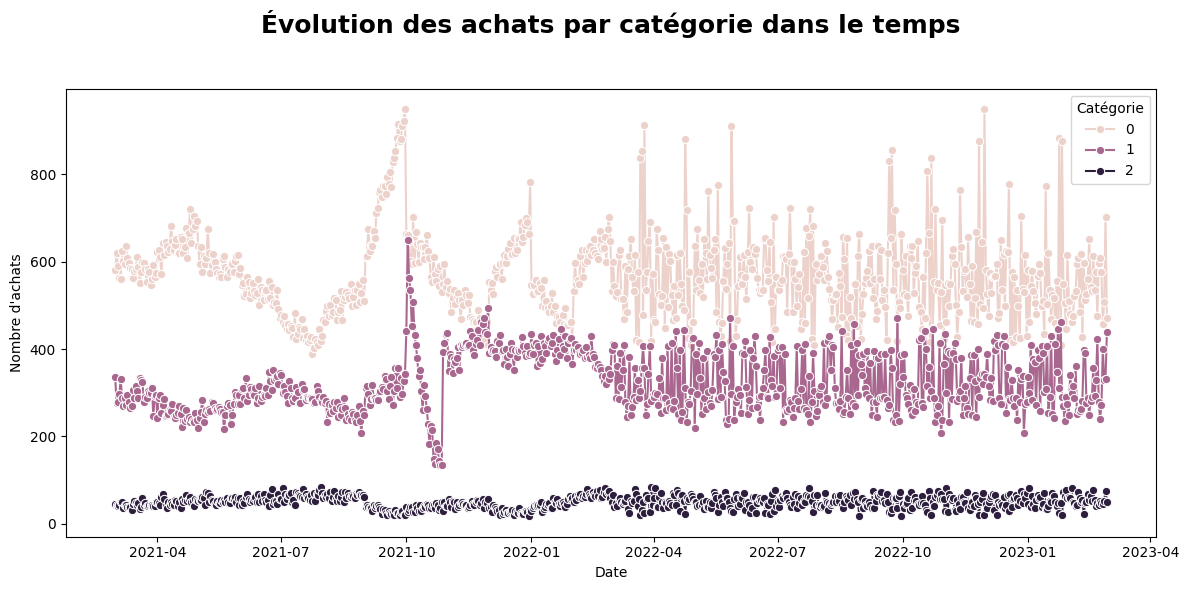

In [37]:
# Graphique de l'Évolution des achats par catégorie dans le temps
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='date', y='count', hue='categ', marker='o')

plt.title('Évolution des achats par catégorie dans le temps', pad=40, size=18, weight = "bold")
plt.xlabel('Date')
plt.ylabel('Nombre d\'achats')
plt.legend(title='Catégorie')
plt.tight_layout()

plt.show()

In [38]:
#Chiffre d'affaire par catégorie
CA_categories = df_data.groupby('categ')[["price"]].sum()
CA_categories

,price
categ,
0,4419730.97
1,4827657.11
2,2780275.02


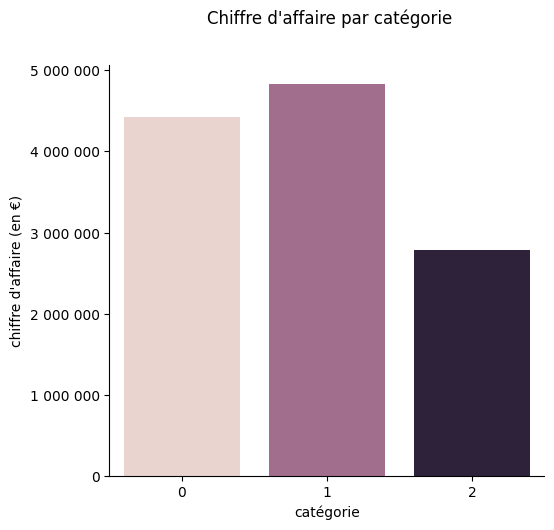

In [39]:
#Graphique du chiffre d'affaire par catégorie
g = sns.catplot(data = CA_categories, kind= 'bar', x='categ', y = 'price', hue='categ')
g._legend.remove()
g.fig.suptitle("Chiffre d'affaire par catégorie", y=1.05)
g.set(xlabel = "catégorie", ylabel = "chiffre d'affaire (en €)")
g.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))
plt.show()

In [40]:
# Evolution du chiffre d'affaire par mois et par catégories
df_data['mois'] = df_data['date'].dt.to_period('M').dt.to_timestamp()
CA_par_mois_par_categories = df_data.groupby(['mois', 'categ'])['price'].sum().reset_index()
CA_par_mois_par_categories

,mois,categ,price
0,2021-03-01,0,193629.17
1,2021-03-01,1,186974.17
2,2021-03-01,2,101837.27
3,2021-04-01,0,205222.46
4,2021-04-01,1,156138.35
...,...,...,...
67,2023-01-01,1,210104.41
68,2023-01-01,2,126153.08
69,2023-02-01,0,162457.00
70,2023-02-01,1,180347.24


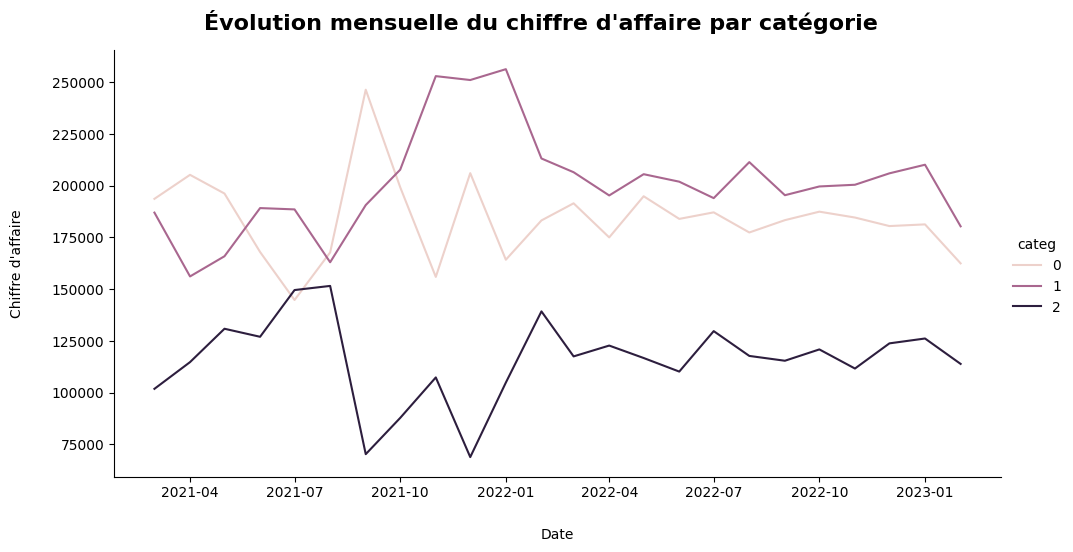

In [41]:
# Graphique de l'Evolution du chiffre d'affaire par mois
g = sns.relplot(data = CA_par_mois_par_categories,  x = 'mois', y = 'price', hue='categ', kind= 'line', aspect=2)
g.fig.suptitle("Évolution mensuelle du chiffre d'affaire par catégorie", y=1.05, fontsize= 16, fontweight = 'bold')
g.ax.set_xlabel("Date", labelpad=20)
g.ax.set_ylabel("Chiffre d'affaire", labelpad=20)
plt.show()

In [42]:
# Nombre de clients uniques par mois
clients_par_mois= df_data.resample("ME", on="date")[["client_id"]].nunique()
clients_par_mois

,client_id
date,
2021-03-31,5676
2021-04-30,5674
2021-05-31,5644
2021-06-30,5659
2021-07-31,5672
2021-08-31,5642
2021-09-30,5693
2021-10-31,6190
2021-11-30,5875


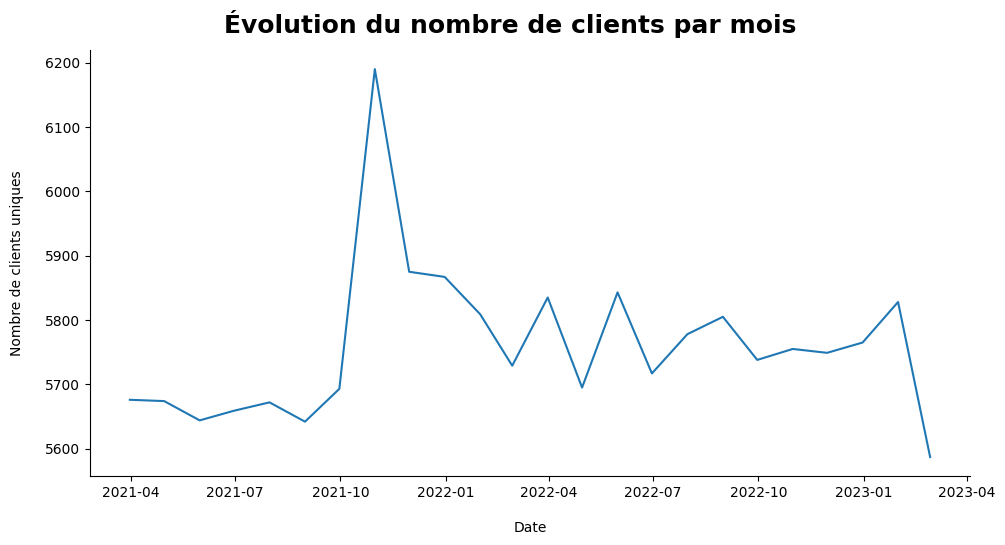

In [43]:
# Graphique du nombre de clients uniques par mois
g = sns.relplot(data = clients_par_mois, x='date', y = "client_id", kind ='line', aspect=2)
g.fig.suptitle("Évolution du nombre de clients par mois", y = 1.05, fontsize = 18, fontweight = 'bold')
g.ax.set_xlabel("Date", labelpad=15)  
g.ax.set_ylabel("Nombre de clients uniques", labelpad=15)  
plt.show()

In [44]:
# Nombre de transactions par mois
df_data_2 = df_data.set_index('date')
transactions_par_mois = df_data_2.resample('ME').size().reset_index(name='nb_transactions')
transactions_par_mois

,date,nb_transactions
0,2021-03-31,28601
1,2021-04-30,28443
2,2021-05-31,28285
3,2021-06-30,26850
4,2021-07-31,24738
5,2021-08-31,25650
6,2021-09-30,33314
7,2021-10-31,30022
8,2021-11-30,28311
9,2021-12-31,32457


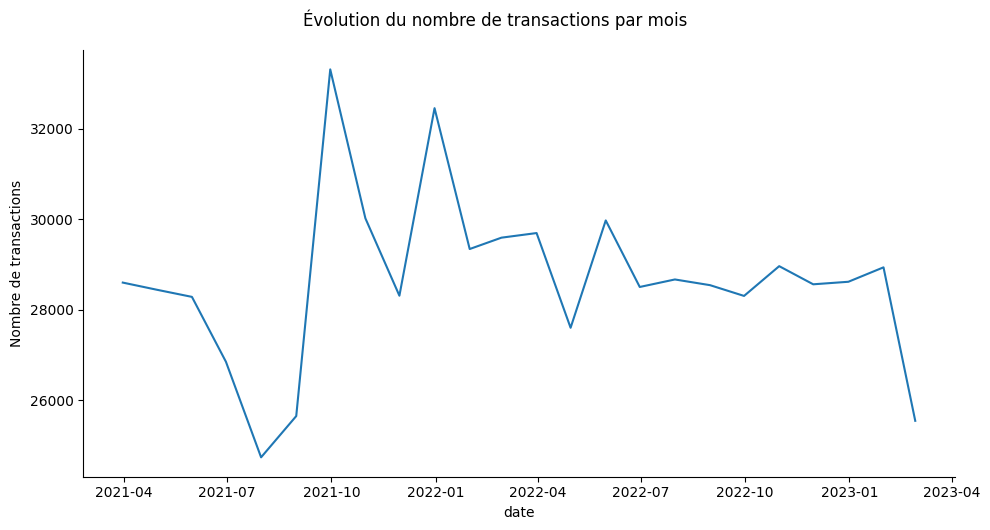

In [45]:
# Graphique du Nombre de transactions par mois
g = sns.relplot(data= transactions_par_mois, x ='date', y = 'nb_transactions', kind = 'line', aspect=2)
g.fig.suptitle("Évolution du nombre de transactions par mois", y =1.05)
g.set(ylabel = "Nombre de transactions")
plt.show()

In [46]:
df_2= df_data.groupby([df_data['date'].dt.date, 'categ']).size().reset_index(name='count')
df_2

,date,categ,count
0,2021-03-01,0,581
1,2021-03-01,1,335
2,2021-03-01,2,46
3,2021-03-02,0,620
4,2021-03-02,1,276
...,...,...,...
2185,2023-02-27,1,332
2186,2023-02-27,2,75
2187,2023-02-28,0,472
2188,2023-02-28,1,439


**LES TOP 20**

In [47]:
# Top 20 des clients qui ont le plus achetés
top_clients_count = df_data['client_id'].value_counts().head(20).reset_index()
top_clients_count.columns = ['client_id', 'nb_achats']
top_clients_count

,client_id,nb_achats
0,c_1609,25586
1,c_6714,9199
2,c_3454,6793
3,c_4958,5222
4,c_2140,405
5,c_3263,403
6,c_2595,398
7,c_2077,386
8,c_1637,384
9,c_7421,381


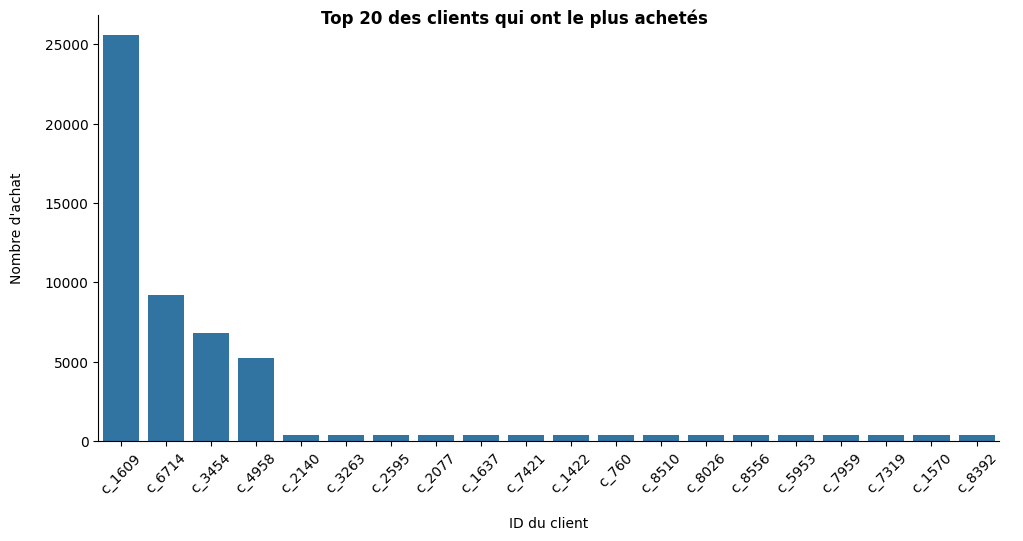

In [55]:
#Graphique Top 20 des clients qui ont le plus achetés
g = sns.catplot(data = top_clients_count, x ='client_id', y = "nb_achats", kind= 'bar', aspect = 2)
g.fig.suptitle("Top 20 des clients qui ont le plus achetés", fontweight = 'bold')
g.ax.set_xlabel("ID du client", labelpad=15)  
g.ax.set_ylabel("Nombre d'achat", labelpad=15) 
plt.xticks(rotation=45)
plt.show()

In [49]:
# Top 20 des clients qui ont le plus générés de chiffres d'affaire
top_clients_CA = df_data.groupby('client_id')['price'].sum().sort_values(ascending=False).head(20).reset_index()
top_clients_CA.columns = ['client_id', 'total_revenue']
top_clients_CA

,client_id,total_revenue
0,c_1609,326039.89
1,c_4958,290227.03
2,c_6714,153918.60
3,c_3454,114110.57
4,c_1570,5285.82
5,c_3263,5276.87
6,c_2140,5260.18
7,c_2899,5214.05
8,c_7319,5155.77
9,c_7959,5135.75


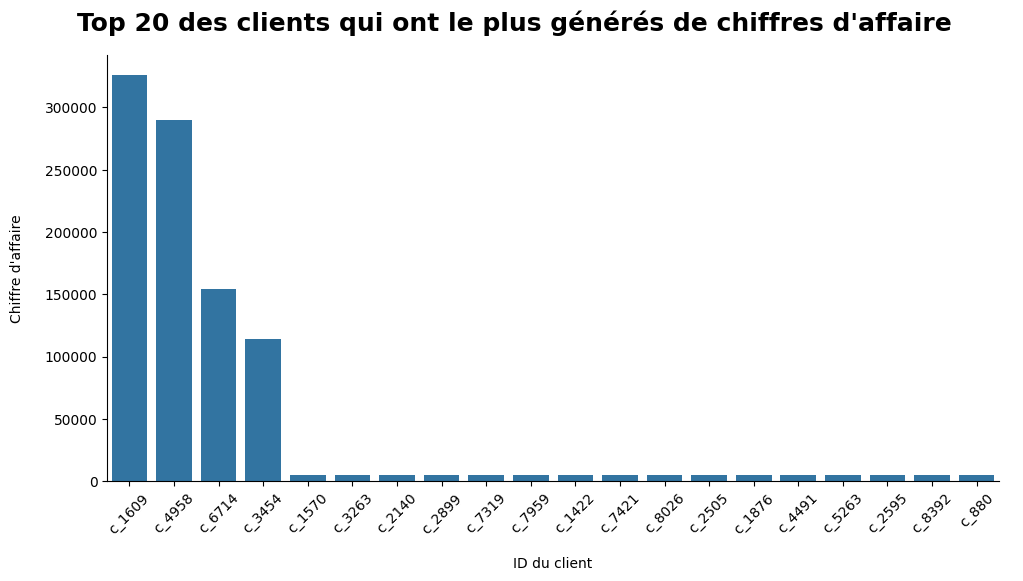

In [58]:
#Grapgique Top 20 des clients qui ont le plus générés de chiffres d'affaire
g = sns.catplot(data = top_clients_CA, x = "client_id", y = "total_revenue", kind = "bar", aspect= 2)
g.fig.suptitle("Top 20 des clients qui ont le plus générés de chiffres d'affaire",
               y=1.06, fontsize = 18, fontweight = 'bold')
g.ax.set_xlabel("ID du client", labelpad=15)  
g.ax.set_ylabel("Chiffre d'affaire", labelpad=15) 
plt.xticks(rotation=45)
plt.show()

In [59]:
df_data.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,mois
0,0_1421,19.99,0,2021-03-01 04:13:00.107748,s_101,c_8533,m,1972,2021-03-01
1,0_1421,19.99,0,2021-03-01 13:48:20.214075,s_285,c_5299,f,1967,2021-03-01
2,0_1421,19.99,0,2021-03-01 15:07:42.730079,s_317,c_8024,f,1936,2021-03-01
3,0_1421,19.99,0,2021-03-02 03:39:21.811833,s_563,c_7702,f,1989,2021-03-01
4,0_1421,19.99,0,2021-03-02 19:09:41.789425,s_850,c_4057,m,1981,2021-03-01


In [64]:
#Courbe de Lorenz
Ca_par_client = df_data.groupby('client_id')[['price']].sum()
sorted_values = np.sort(Ca_par_client['price'].values)

# Cumul des valeurs
cumulative = np.cumsum(sorted_values)

# Normalisation
cumulative_percent = cumulative / cumulative[-1]  # cumulé / total
x = np.linspace(0.0, 1.0, len(cumulative_percent))

# Ajout de 0 au début pour la courbe
x = np.insert(x, 0, 0)
cumulative_percent = np.insert(cumulative_percent, 0, 0)

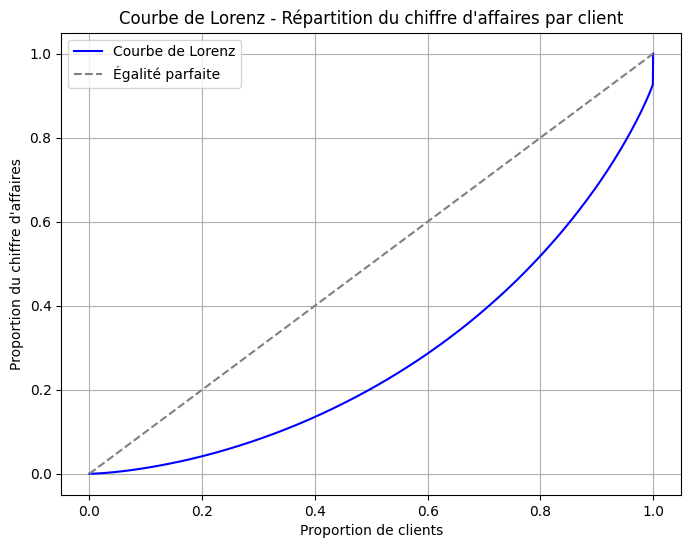

In [65]:
plt.figure(figsize=(8, 6))
plt.plot(x, cumulative_percent, label='Courbe de Lorenz', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Égalité parfaite')
plt.title("Courbe de Lorenz - Répartition du chiffre d'affaires par client")
plt.xlabel("Proportion de clients")
plt.ylabel("Proportion du chiffre d'affaires")
plt.legend()
plt.grid(True)
plt.show()

In [67]:
# Indice de GINI
gini = 1 - 2 * np.trapezoid(cumulative_percent, x)
print(f"Indice de Gini : {gini:.4f}")

Indice de Gini : 0.4418


In [ ]:
** inégalités modérées à fortes, Une minorité de clients génèrent une part significative du CA/**